In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 12
plt.rc('axes', labelsize=20) 
plt.set_cmap('coolwarm')
plt.rcParams["figure.figsize"] = [8,8].

<Figure size 432x288 with 0 Axes>

1.2000234377289043


Text(0, 0.5, 'Entropy')

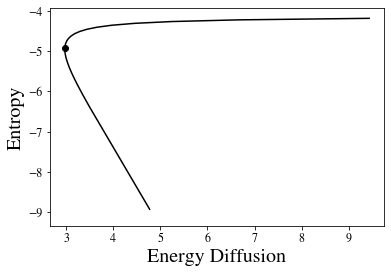

In [173]:
#setting the same resolution as the OpenFOAM simulations
dz = 1/160
zz = np.arange(0,161,1)/160
r = np.arange(20,0.5,-0.1)
ediffEnt = r*0
chi2Ent = r*0
chi3Ent = r*0
tauzEnt = r*0
entropy = r*0
for i in range(0,r.shape[0]):
    #using maximum entropy solution branch in which \lambda = 0
    uEnt = 1 - (1-zz)**r[i]
    uEnt /= np.trapz(uEnt)*dz
    dudz = (uEnt[1:]-uEnt[0:-1])
    chi2Ent[i] = np.trapz(uEnt**2)*dz 
    ediffEnt[i] = np.trapz((uEnt[1:]-uEnt[0:-1])**2)/dz
    tauzEnt[i] = (uEnt[2]-uEnt[0])/(2*dz)
    entropy[i] = np.trapz(np.log(dudz))*dz
    chi3Ent[i] = np.trapz(uEnt**3)*dz 
#plt.plot(chi2Ent,entropy)
plt.plot(ediffEnt,entropy,'k')
plt.plot(ediffEnt[-15],entropy[-15],'k o')
print(chi2Ent[-15])
plt.xlabel('Energy Diffusion')
plt.ylabel('Entropy')

#plt.pause(10000)

Text(0, 0.5, 'Entropy')

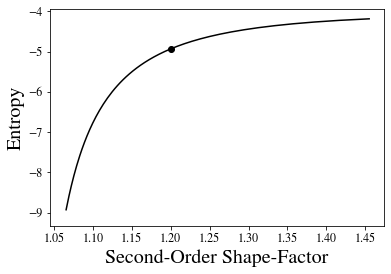

In [174]:
plt.plot(chi2Ent,entropy,'k')
plt.plot(chi2Ent[-15],entropy[-15],'k o')
plt.xlabel('Second-Order Shape-Factor')
plt.ylabel('Entropy')


Text(0, 0.5, 'Energy Diffusion')

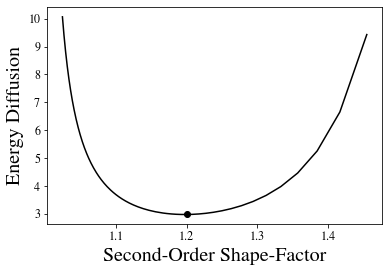

In [175]:
plt.plot(chi2Ent,ediffEnt,'k')
plt.plot(chi2Ent[-15],ediffEnt[-15],'k o')
plt.xlabel('Second-Order Shape-Factor')
plt.ylabel('Energy Diffusion')

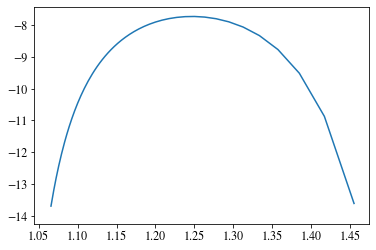

In [176]:
plt.plot(chi2Ent,entropy - ediffEnt)

Text(0, 0.5, 'Third-Order Shape-Factor')

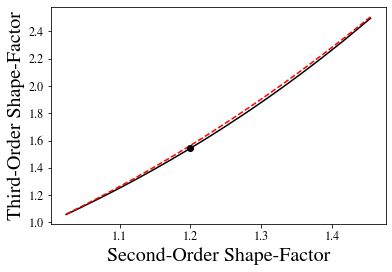

In [177]:
plt.plot(chi2Ent,chi3Ent,'k')
plt.plot(chi2Ent,chi2Ent**2.45,'r--')
plt.plot(chi2Ent[-15],chi3Ent[-15],'k o')
plt.xlabel('Second-Order Shape-Factor')
plt.ylabel('Third-Order Shape-Factor')